In [362]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
from numpy import mean
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import rankdata
from statsmodels.stats.proportion import proportions_ztest

# Задача 1

Из партии батареек с номинальным напряжением 12 В наугад выбрано семь штук. Согласно показаниям высокоточного вольтметра, фактически выдаваемое ими напряжение составило: 12,9; 11,6; 13,5; 13,9; 12,1; 11,9; 13,0 В соответственно. Можно ли считать, что среднее напряжение действительно равно 12 В?

### Гипотезы:
- **Нулевая гипотеза (𝐻_0):** Среднее напряжение ($\bar{X}$) равно $\mu_0$ = 12 В.
- **Альтернативная гипотеза (𝐻_a):** Среднее напряжение ($\bar{X}$) $\neq$ $\mu_0$ (двусторонний тест)

### Уровень значимости:
$\alpha$ = 0.05

## Для этого найду:
- t-статистику
- $p_{value}$

In [363]:
sample = np.array([12.9, 11.6, 13.5, 13.9, 12.1, 11.9, 13.0])

mu_0 = 12.0

Перед использованием Т-статистики нужно проверить, что данные распределены нормально, буду использовать тест Шапиро-Уилка

У меня нулевая гипотеза - данные распределены нормально, а альтернативная - распределены не нормально

Уровень значимости = 0.05

In [364]:
stat, p_value = stats.shapiro(sample)

if p_value > 0.05:
    print("Данные нормально распределены")
else:
    print("Данные не нормально распределены")

Данные нормально распределены


In [365]:
# число степеней свободы:

free = len(sample) - 1

# Среднее: 

mean = mean(sample)

# Дисперсия

diff = []
for i in sample:
    diff.append((i - mean)**2)

S = sum(diff) / (len(sample))

# Можно проверить через метод библиотеки numpy, они совпадают

S_np = np.var(sample, ddof=1)

# Теперь можно рассчитать статистику:

T_stat = (mean - mu_0) * np.sqrt(free) / (np.sqrt(S))

# и p-value:

P_value = 2 * (1 - stats.t.cdf(abs(T_stat), df=free))

print(f"{P_value=}, {T_stat=}")

P_value=np.float64(0.07430190210562304), T_stat=np.float64(2.1578017974978794)


Или, как показывали на лекции, можно короче:

In [366]:
t_stat, p_value = stats.ttest_1samp(sample, mu_0)
print(f"{p_value=}, {t_stat=}")

p_value=np.float64(0.07430190210562303), t_stat=np.float64(2.1578017974978794)


In [367]:
alpha = 0.05
if p_value < alpha:
    print("Отклоняю нулевую гипотезу, то есть среднее напряжение отличается от 12 В")
else:
    print("Не отклоняю нулевую гипотезу: среднее напряжение = 12 В")

Не отклоняю нулевую гипотезу: среднее напряжение = 12 В


# Задача 2

Есть два различных метода определения процентного содержания жира в мясе. Доля жира для 10 образцов мяса была определена каждым из двух методов. Позволяют ли полученные результаты сделать вывод о том, что один метод даёт в среднем более высокие показания, чем другой?

| №   | Метод I | Метод II |
|-----|---------|----------|
| 1   | 23,1    | 22,7     |
| 2   | 23,2    | 23,6     |
| 3   | 26,5    | 27,1     |
| 4   | 26,6    | 27,4     |
| 5   | 27,1    | 27,4     |
| 6   | 48,3    | 46,8     |
| 7   | 40,5    | 40,4     |
| 8   | 25,0    | 24,9     |
| 9   | 38,4    | 38,1     |
| 10  | 23,5    | 23,8     |

### Гипотезы:
- **Нулевая гипотеза (𝐻_0):** $\mu_0$ = $\mu_x - \mu_y$ = 0 (средняя разность равна 0). То есть разницы в методах нет. 
- **Альтернативная гипотеза (𝐻_a):** $\mu_0$ $\neq$ 0. Разница в методах есть. И тут можно сделать, что $\mu_0$ $>$ 0 или $\mu_0$ $<$ 0

Вообще в лекции было, но мне через нули как - то интуитивнее понятнее:

$H_0 : \mu_x = \mu_y$

$H_A : \mu_x \neq \mu_y$

### Уровень значимости:
$\alpha$ = 0.05

## Для этого найду:
- t-статистику
- $p_{value}$

Это одновыборочная задача, потому что наблюдения здесь парные (для одного и того же образца были проведены измерения). Поэтому отличие от предыдущей задачи: просто посчитать разницу для каждого образца. И дальше считать по одновыборочному критерию.

In [368]:
method_1 = np.array([23.1, 23.2, 26.5, 26.6, 27.1, 48.3, 40.5, 25.0, 38.4, 23.5])
method_2 = np.array([22.7, 23.6, 27.1, 27.4, 27.4, 46.8, 40.4, 24.9, 38.1, 23.8])

diff_methods = method_1 - method_2
mu_0_2 = 0

In [369]:
# Проверка на нормальность:

stat, p_value = stats.shapiro(diff_methods)

if p_value > 0.05:
    print("Данные нормально распределены")
else:
    print("Данные не нормально распределены")

Данные нормально распределены


In [370]:
# число степеней свободы:

free_2 = len(diff_methods) - 1

# Среднее: 

mean_2 = np.mean(diff_methods)

# Дисперсия

diff_2 = []
for i in diff_methods:
    diff_2.append((i - mean_2)**2)

S_2 = sum(diff_2) / (len(diff_methods))

# Можно проверить через метод библиотеки numpy, они совпадают

S_np_2 = np.var(diff_methods, ddof=1)

# Теперь можно рассчитать статистику:

T_stat_2 = (mean_2 - mu_0_2) * np.sqrt(free_2) / (np.sqrt(S_2))

# и p-value:

P_value_2 = (1 - stats.t.cdf(abs(T_stat_2), df=free_2))

print(f"{P_value_2=}, {T_stat_2=}")

P_value_2=np.float64(0.49999999999999933), T_stat_2=np.float64(1.715488497867803e-15)


In [371]:
t_stat_2, p_value_2 = stats.ttest_1samp(diff_methods, mu_0_2)
print(f"{t_stat_2=}, {p_value_2/2=}")

t_stat_2=np.float64(1.7154884978678027e-15), p_value_2/2=np.float64(0.49999999999999933)


In [372]:
alpha = 0.05
if P_value_2 < alpha:
    print("Отклоняю нулевую гипотезу, то есть разница в методах есть")
else:
    print("Не отклоняю нулевую гипотезу: разницы в методах нет")

Не отклоняю нулевую гипотезу: разницы в методах нет


# Задача 3

Для проверки гипотезы о том, что жители городов имеют в среднем более высокое систолическое артериальное давление, чем жители сельской местности, было проведено обследование 10 горожан и 9 жителей села примерно одного возраста. Получены следующие данные об уровне давления для горожан: 132, 111, 119, 138, 200, 131, 138, 170, 159, 140; для селян: 115, 190, 127, 155, 148, 121, 116, 121, 197. Можно ли считать верной выдвинутую гипотезу на уровне значимости 0,05?

### Гипотезы:
- **Нулевая гипотеза (𝐻_0):** Давление жителей города равно давлению жителей сельской местности, то есть $\mu_x = \mu_y$.
- **Альтернативная гипотеза (𝐻_a):** Давление жителей города выше: $\mu_x > \mu_y$ (односторонний тест)

### Уровень значимости:
$\alpha$ = 0.05

## Для этого найду:
- t-статистику
- $p_{value}$

In [373]:
village = np.array([115, 190, 127, 155, 148, 121, 116, 121, 197])
city = np.array([132, 111, 119, 138, 200, 131, 138, 170, 159, 140])

Перед использованием Т-статистики нужно проверить, что данные распределены нормально, буду использовать тест Шапиро-Уилка

У меня нулевая гипотеза - данные распределены нормально, а альтернативная - распределены не нормально

Уровень значимости = 0.05

In [374]:
stat_vil, p_value_vil = stats.shapiro(village)

if p_value_vil > 0.05:
    print("Данные селян нормально распределены")
else:
    print("Данные селян не нормально распределены")

Данные селян не нормально распределены


In [375]:
stat_city, p_value_city = stats.shapiro(city)

if p_value_city > 0.05:
    print("Данные горожан нормально распределены")
else:
    print("Данные горожан не нормально распределены")

Данные горожан нормально распределены


Мне кажется, тут прям видно, что они идут со сдвигом, а это как раз про Манна-Уитни

Text(0.5, 0, 'Номер человека')

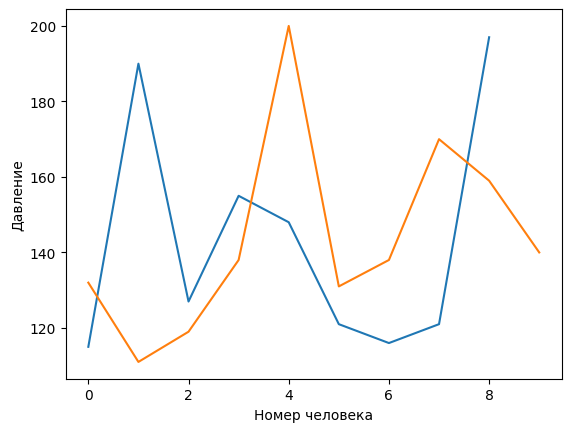

In [376]:
plt.plot(village)
plt.plot(city)
plt.ylabel('Давление')
plt.xlabel('Номер человека')

Поскольку данные о давлении селян не распределены нормально, применю тест Манна-Уитни. Этот тест используется для сравнения медиан двух независимых выборок, когда распределения не нормальны. Еще и от выбросов обезопасит (вдруг в городе есть женщина, у которой постоянно очень высокое давление)

In [377]:
stat_mw, p_value_mw = mannwhitneyu(city, village, alternative='greater')

# alternative='greater' означает, что я тестирую гипотезу о том, что среднее значение давления у горожан больше, чем у селян

In [378]:
if p_value_mw < alpha:
    print("Отклоняю нулевую гипотезу, то есть разница в давлениях есть: давление горожан больше, чем у селян")
else:
    print("Не отклоняю нулевую гипотезу: разницы в давлениях нет")

Не отклоняю нулевую гипотезу: разницы в давлениях нет


Можно еще ручками закодить:

In [379]:
X = np.concatenate((city, village))

X_sorted = sorted(X)

ranks = {value: rank + 1 for rank, value in enumerate(X_sorted)}

# Присвою ранг каждому элементу в исходном массиве:

ranked_X = [ranks[value] for value in X]

# Разделение рангов по группам
m_city = len(city)
n_village = len(village)

R1 = np.sum(ranked_X[:m_city])
R2 = np.sum(ranked_X[m_city:])

# Расчет U-статистики
U1 = R1 - (m_city * (m_city + 1)) / 2
U2 = R2 - (n_village * (n_village + 1)) / 2

print(f"U-статистика: {U1}")

U-статистика: 51.0


У меня статистика отличается, я думаю, это связано с повторяющимися значениями в массивах (присваиваются одинаковые ранги), чтобы дисперсия прям хорошо сошлась, можно использовать метод rankdata:

In [380]:
ranks = rankdata(X)

R1 = np.sum(ranks[:m_city])
R2 = np.sum(ranks[m_city:])

U1 = R1 - (m_city * (m_city + 1)) / 2
U2 = R2 - (n_village * (n_village + 1)) / 2

print(f"U-статистика: {U1}")

U-статистика: 50.0


Интересно, что через значение t-критерия тоже получается, что не отклоняем нулевую гипотезу:

In [381]:
t_stat, p_value = ttest_ind(city, village, alternative='greater')

if p_value < alpha:
    print("Отклоняю нулевую гипотезу, то есть разница в давлениях есть: давление горожан больше, чем у селян")
else:
    print("Не отклоняю нулевую гипотезу: разницы в давлениях нет")

Не отклоняю нулевую гипотезу: разницы в давлениях нет


# Задача 4

Известно, что 52% новорождённых детей — мальчики, а 48% — девочки. В случайной выборке из 5 000 человек в возрасте от 30 до 60 лет мужчин оказалось 2 500. Можно ли на уровне значимости 0,05 считать, основываясь на этих данных, что смертность среди мужчин и женщин одинакова?

### Гипотезы:
- **Нулевая гипотеза (𝐻_0):** Доля взрослых мужчин в выборке соответствует доле мальчиков среди новорожденных (p = 0.52).
- **Альтернативная гипотеза (𝐻_a):** Доля взрослых мужчин в выборке НЕ соответствует доле мальчиков среди новорожденных (p $\neq$ 0.52).

Уровень значимости $\alpha  =0.05$

Сначала проверю, что я могу применить нормальное распределение:

In [382]:
N = 5000
p_0 = 0.52
man = 2500

if N * p_0 >= 5 and N * (1 - p_0) >= 5:
    print("Можно применять норм распределение")
else:
    print("Нормальное распределение применять нельзя")

Можно применять норм распределение


Статистику рассчитаем как:

$Z = \frac{\bar{p} - p_0}{var} = \frac{\bar{p} - p_0}{\sqrt{\frac{p_0(1 - p_0)}{N}}}$

$\bar{p}$ -  выборочная пропорция мужчин

In [383]:
p_ = man/N
var = np.sqrt((p_0*(1-p_0))/N)
stats_z = (p_ - p_0)/var

Поскольку у нас большая выборка, то просто берем значение для критической области |1.96|

var = -2.83 = >  попадаем в критическую область, то есть Z = −2.83 < −1.96

Чтобы найти p_value, нужно получить вероятность P(Z < −2.83)

Вероятность P(Z < −2.83) — это площадь под кривой нормального распределения слева от точки Z=−2.83 (в целом можно и справа, у нас же все симметрично).

С помощью калькулятора (https://stattrek.com/online-calculator/normal) нашла P(Z < −2.83) $\approx$ 0.00233

Использовала параметры:

Mean (среднее): 0,
Standard deviation (стандартное отклонение): 1,
X value (значение Z): -2.83.


p_value = 2*P(Z < −2.83) = 2 * 0.00233 = 0.00466

### H_0 Гипотезу отклоняю

In [385]:
stat, p_value = proportions_ztest(count=man, nobs=N, value=p_0, alternative='two-sided')

print(f"z-статистика: {stat:.2f}")
print(f"p-значение: {p_value:.3f}")

if p_value < alpha:
    print("Отклоняю нулевую гипотезу, смертность различна среди мужчин и женщин")
else:
    print("Не отклоняю нулевую гипотезу: смертность среди мужчин и женщин одинакова")

z-статистика: -2.83
p-значение: 0.005
Отклоняю нулевую гипотезу, смертность различна среди мужчин и женщин


# Задача 5

В первом эксперименте для сравнения двух средних X1=17, X2=16 применялся t-критерий Стьюдента, и эти различия оказались значимы (p = 0,001)

Во втором исследовании, также при помощи t - критерия, сравнивались два средних X1=17, X2=36, и эти различия не значимы при p = 0,8. В чем может быть причина таких результатов, при условии, что нулевая и альтернативная гипотезы в обоих случаях одинаковы?

1) во - первых, может сильно влиять объем выборки. Если в первом эксперименте выборки были большими, то t-критерий мог выявить значимые различия даже при небольшой разнице средних. А во втором эксперименте наоборт, выборка могла быть очень маленькой, поэтому сразу уменьшается чувствительность теста к разности средних.

Зависимость такая: СКО больше, при меньших n, а большое СКО приводит к меньшему значению t-статистики, а значит, к большему p_value.

2) Также может быть такое, что во втором эксперименте данные содержали выбросы, которые увеличили стандартное отклонение

3) Еще может быть проблема в типах гипотез (двусторонняя или односторонняя). Например, оба эксперимента могли использовать односторонние тесты, но разное направление гипотезы. Тогда $H_a : X_1 > X_2$ не то же самое, что $H_a : X_1 < X_2$